In [1]:
from dds.configs.config import set_task, get_config
from dds.train_dds import train_dds

import numpy as onp

In [2]:
funnel_config = get_config()

# Time and step settings (Need to be done before calling set_task)
funnel_config.model.tfinal = 6.4
funnel_config.model.dt = 0.05
if funnel_config.model.reference_process_key == "oudstl":
    funnel_config.model.step_scheme_key = "cos_sq"

funnel_config = set_task(funnel_config, "simple_gaussian")
funnel_config.model.reference_process_key = "oudstl"

print(funnel_config.model.sigma, funnel_config.model.alpha, funnel_config.model.exp_dds)
if funnel_config.model.reference_process_key == "oudstl":
    funnel_config.model.step_scheme_key = "cos_sq"
    
    # Opt setting for funnel
    funnel_config.model.sigma = 1.075
    funnel_config.model.alpha = 0.6875
    funnel_config.model.m = 1.0
        
    # Path opt settings    
    funnel_config.model.exp_dds = True


funnel_config.model.stl = False
funnel_config.model.detach_stl_drift = False

funnel_config.trainer.notebook = True
funnel_config.trainer.epochs = 11000
# Opt settings we use
# funnel_config.trainer.learning_rate = 0.0001
funnel_config.trainer.learning_rate = 5 * 10**(-3)
funnel_config.trainer.lr_sch_base_dec = 0.99 # For funnel

0.25 0.5 False


In [3]:
funnel_config.model.reference_process_key 

'oudstl'

In [4]:
funnel_config.model.input_dim

2

In [5]:
funnel_config.model.step_scheme_key

'cos_sq'

In [6]:
funnel_config.model.ts.shape

(128,)

In [7]:
funnel_config.trainer.epochs =  100 #1000
out_dict = train_dds(funnel_config)

('epoch: %s %s  loss: %s', 0, 'TRAIN', 0.01272923406213522)
('epoch: %s %s  loss: %s', 1, 'TRAIN', 0.013053728267550468)
('epoch: %s %s  loss: %s', 2, 'TRAIN', 0.006198232062160969)
('epoch: %s %s  loss: %s', 3, 'TRAIN', 0.008419507183134556)
('epoch: %s %s  loss: %s', 4, 'TRAIN', 0.014933441765606403)
('epoch: %s %s  loss: %s', 5, 'TRAIN', 0.01104611437767744)
('epoch: %s %s  loss: %s', 6, 'TRAIN', 0.00010750133515102789)
('epoch: %s %s  loss: %s', 7, 'TRAIN', 0.009714911691844463)
('epoch: %s %s  loss: %s', 8, 'TRAIN', 0.0038342191837728024)
('epoch: %s %s  loss: %s', 9, 'TRAIN', 0.0036950926296412945)
('epoch: %s %s  loss: %s', 10, 'TRAIN', 0.004483573138713837)
('epoch: %s %s  loss: %s', 11, 'TRAIN', 0.008004827424883842)
('epoch: %s %s  loss: %s', 12, 'TRAIN', 0.0032091867178678513)
('epoch: %s %s  loss: %s', 13, 'TRAIN', 0.008064464665949345)
('epoch: %s %s  loss: %s', 14, 'TRAIN', 0.011308107525110245)
('epoch: %s %s  loss: %s', 15, 'TRAIN', 0.00402484368532896)
('epoch: %s %s  

In [8]:
out_dict[-1].keys()

dict_keys(['elbo', 'is', 'pf', 'elbo_eval', 'is_eval', 'pf_eval', 'aug', 'aug_ode', 'aug_ode_ext'])

In [9]:
onp.mean(out_dict[-1]["is_eval"])

-0.0001820087432861328

In [10]:
onp.mean(out_dict[-1]["pf_eval"])

-0.009339253107706705

In [11]:
out_dict[-1]["is"]

[0.0024251937866210938,
 0.002906322479248047,
 -0.003055572509765625,
 -0.0009937286376953125,
 0.004589080810546875,
 0.0019254684448242188,
 -0.005733013153076172,
 -0.0018568038940429688,
 -0.0012669563293457031,
 -0.0019893646240234375,
 -0.0022177696228027344,
 0.0035104751586914062,
 -0.004500389099121094,
 0.0007953643798828125,
 0.0017132759094238281,
 -0.0006289482116699219,
 -0.0030679702758789062,
 0.001373291015625,
 -0.0011730194091796875,
 -0.0025730133056640625,
 -0.0004773139953613281,
 -0.0006198883056640625,
 -0.0003757476806640625,
 -0.0034933090209960938,
 0.0002770423889160156,
 0.0012521743774414062,
 0.0012946128845214844,
 0.0029892921447753906,
 -0.0005369186401367188,
 -0.0003247261047363281,
 0.0011801719665527344,
 0.0011200904846191406,
 -0.0013241767883300781,
 -0.0023603439331054688,
 0.00048732757568359375,
 0.0010461807250976562,
 -0.00022029876708984375,
 -0.0013060569763183594,
 0.0007958412170410156,
 0.001491546630859375,
 -1.621246337890625e-05,
 

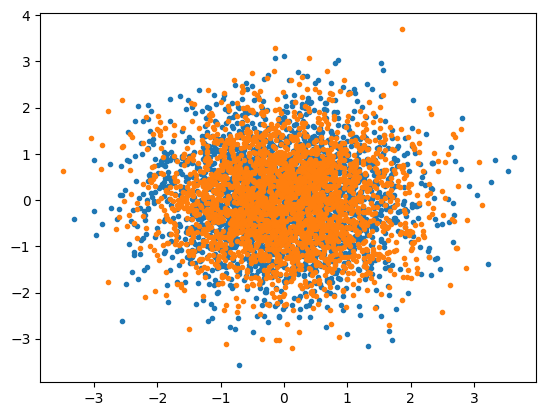

In [12]:
import matplotlib.pyplot as plt

ode_targ = out_dict[-1]["aug_ode"][:, -1,:2]
sde_targ = out_dict[-1]["aug"][:, -1,:2]

plt.plot(ode_targ[:, 0], ode_targ[:, 1], ".")
plt.plot(sde_targ[:, 0], sde_targ[:, 1], ".")

In [13]:
funnel_config.model.source(out_dict[-1]["aug_ode"][:, 0,:2])

Array([-1.9955969, -2.105371 , -2.3901384, ..., -2.2080073, -2.2337465,
       -2.2710934], dtype=float32)

In [14]:
 funnel_config.model.sigma

1.075

In [15]:
import distrax
import numpy as np

equi_normal2 = distrax.MultivariateNormalDiag( np.zeros(2) , funnel_config.model.sigma * np.ones(2))

equi_normal2.log_prob(out_dict[-1]["aug_ode"][:, 0,:2])

Array([-1.9955969, -2.105371 , -2.3901384, ..., -2.2080073, -2.2337465,
       -2.2710934], dtype=float32)

In [16]:
funnel_config.model.target

<bound method Transformed.log_prob of <distrax._src.distributions.mvn_diag.MultivariateNormalDiag object at 0x287657190>>

In [17]:
cake = funnel_config.trainer.lnz_pf_estimator(
    out_dict[-1]["aug_ode"], funnel_config.model.source, funnel_config.model.target, debug=False)

In [18]:
cake

Array(-0.01230812, dtype=float32)

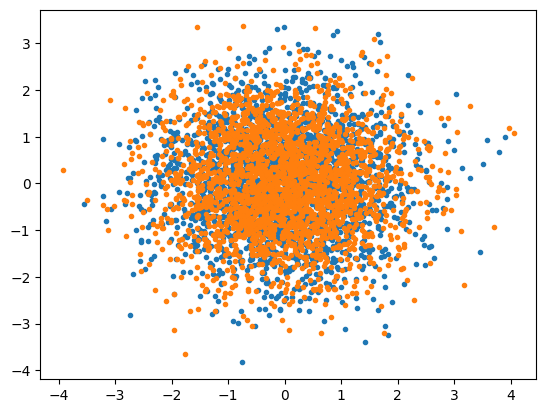

In [19]:
import matplotlib.pyplot as plt

timestep = 2

ode_targ = out_dict[-1]["aug_ode"][:, timestep,:2]
sde_targ = out_dict[-1]["aug"][:, timestep,:2]

plt.plot(ode_targ[:, 0], ode_targ[:, 1], ".")
plt.plot(sde_targ[:, 0], sde_targ[:, 1], ".")

In [20]:
out_dict[-1]["aug"][:, -1,:2]

Array([[ 1.6214819 , -0.61184484],
       [ 0.03983799, -0.8295712 ],
       [ 0.73537004, -0.18405639],
       ...,
       [ 2.8773508 , -1.4616865 ],
       [-0.0516793 ,  1.2247682 ],
       [ 2.5387647 ,  0.03920635]], dtype=float32)

In [21]:
funnel_config.model.step_scheme_key 

'cos_sq'

In [22]:
funnel_config

{'dataset': {}, 'eval': {'seeds': 30}, 'model': {'activation': <function gelu at 0x28765a8c0>, 'activation_dict': {'gelu': <function gelu at 0x28765a8c0>, 'relu': <jax._src.custom_derivatives.custom_jvp object at 0x10dd79f60>, 'swish': <PjitFunction of <function silu at 0x10dd7db40>>}, 'activation_key': 'gelu', 'alpha': 0.6875, 'batch_size': 300, 'detach_path': False, 'detach_stl_drift': False, 'dt': 0.05, 'elbo_batch_size': 2000, 'exp_dds': True, 'fully_connected_units': [64, 64], 'input_dim': 2, 'learn_betas': False, 'log': False, 'm': 1.0, 'network_dict': {'pis': <class 'dds.drift_nets.PISGRADNet'>, 'pisudp': <class 'dds.drift_nets_udp.UDPPISGRADNet'>, 'vanilla': <class 'dds.drift_nets.SimpleDriftNet'>, 'vanilla_udp': <class 'dds.drift_nets_udp.UDPSimpleDriftNet'>}, 'network_key': 'pis', 'plot_dist': <function simple_gaussian.<locals>.plot_distribution at 0x2876b92d0>, 'reference_process_dict': {'oudstl': <class 'dds.stl_samplers.AugmentedOUDFollmerSDESTL'>, 'oududp': <class 'dds.ud